Datos de ejercicios:

Ejercicio 1

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
path = "C:/Users/Vespertino/Documents/iris/"
# path = "../datos/"

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 17 17:33:00 2022

@author: Vespertino
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Inspecciona el fichero. Resume sus principales características (escribe un 
# markdown)
datos = pd.read_csv(path + "insurance.csv", sep = ",")


In [5]:
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


La longitud del sépalo varia entre 4,3 y 7.9.

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Vamos a convertir la longitud del sépalo en una categoría para poder usar la función bar.
La nueva columna representa la longitud del sépalo con un número entero. El rango de valores de la longitud y el número por el que se divide determinan el número de posibles valores (categorías) para la nueva columna.
Cada categoría es equivalente a un intervalo en el histograma.

In [9]:
datos.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Separamos por especie

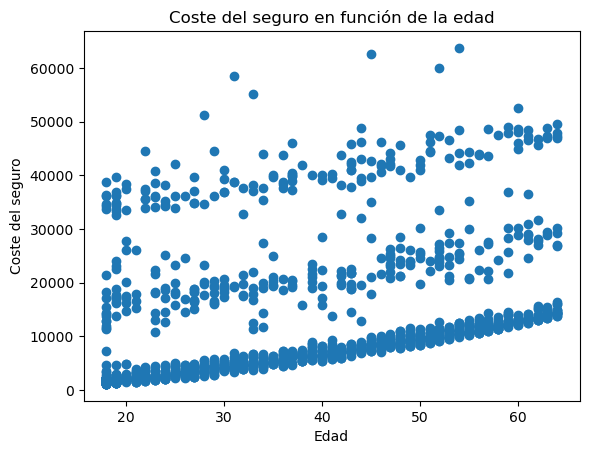

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Mostrar en una gráfica el coste del seguro en función de la edad (un punto para 
# cada persona en el conjunto de datos)

fig, ax = plt.subplots()

ax.scatter(datos['age'], datos['charges'])

ax.set_xlabel('Edad')
ax.set_ylabel('Coste del seguro')
ax.set_title('Coste del seguro en función de la edad')

plt.show()

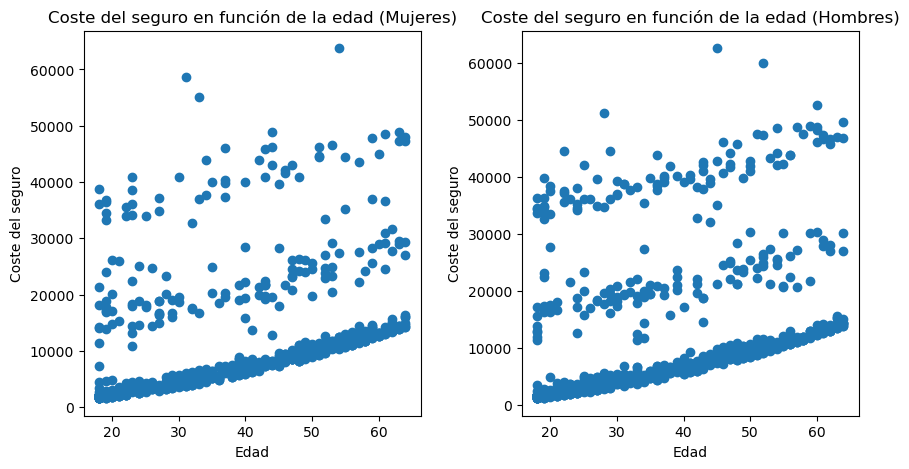

In [18]:
# Mostrar en una gráfica con dos subplots el coste del seguro en función de la edad, 
# con un subplot para mujeres y otro para hombres


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.scatter(datos.loc[datos['sex'] == 'female', 'age'], datos.loc[datos['sex'] == 'female', 'charges'])
ax2.scatter(datos.loc[datos['sex'] == 'male', 'age'], datos.loc[datos['sex'] == 'male', 'charges'])
ax1.set_xlabel('Edad')
ax1.set_ylabel('Coste del seguro')
ax1.set_title('Coste del seguro en función de la edad (Mujeres)')

ax2.set_xlabel('Edad')
ax2.set_ylabel('Coste del seguro')
ax2.set_title('Coste del seguro en función de la edad (Hombres)')
fig.subplots_adjust(wspace=0.3)
plt.show()


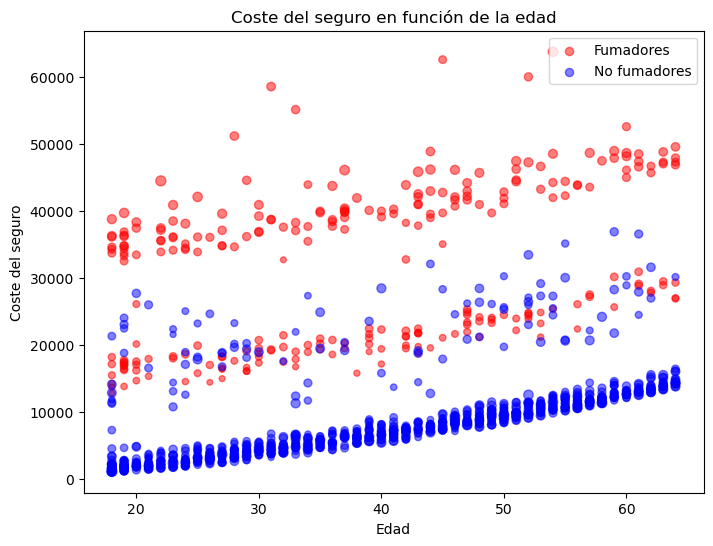

In [20]:
# Mostrar en una gráfica el coste del seguro en función de la edad, con colores 
# diferentes para fumadores y no fumadores. El tamaño de cada punto debe estar en
# función del índice de masa corporal (columna bmi).

fig, ax = plt.subplots(figsize=(8, 6))
scatter_fum = ax.scatter(datos.loc[datos['smoker'] == 'yes', 'age'], 
                          datos.loc[datos['smoker'] == 'yes', 'charges'], 
                          s=datos.loc[datos['smoker'] == 'yes', 'bmi'], 
                          c='red', alpha=0.5, label='Fumadores')

scatter_nofum = ax.scatter(datos.loc[datos['smoker'] == 'no', 'age'], 
                            datos.loc[datos['smoker'] == 'no', 'charges'], 
                            s=datos.loc[datos['smoker'] == 'no', 'bmi'], 
                            c='blue', alpha=0.5, label='No fumadores')
ax.set_xlabel('Edad')
ax.set_ylabel('Coste del seguro')
ax.set_title('Coste del seguro en función de la edad')
ax.legend(handles=[scatter_fum, scatter_nofum], loc='upper right')
plt.show()


Ejercicio 2. (Matplotlib).

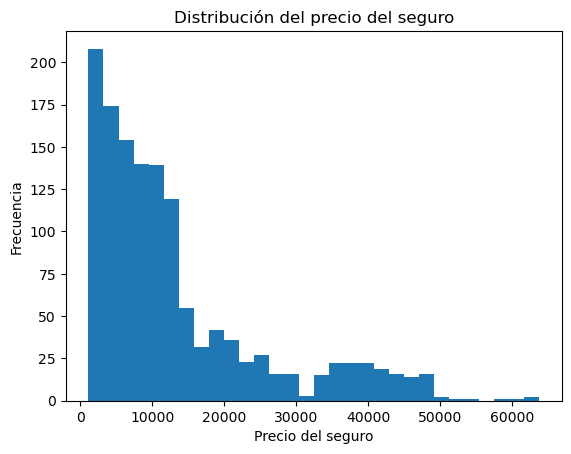

In [21]:
#Mostrar un histograma con la distribución del precio del seguro.

# seleccionar la columna "charges"
charges = datos["charges"]

# mostrar el histograma
plt.hist(charges, bins=30)
plt.xlabel("Precio del seguro")
plt.ylabel("Frecuencia")
plt.title("Distribución del precio del seguro")
plt.show()


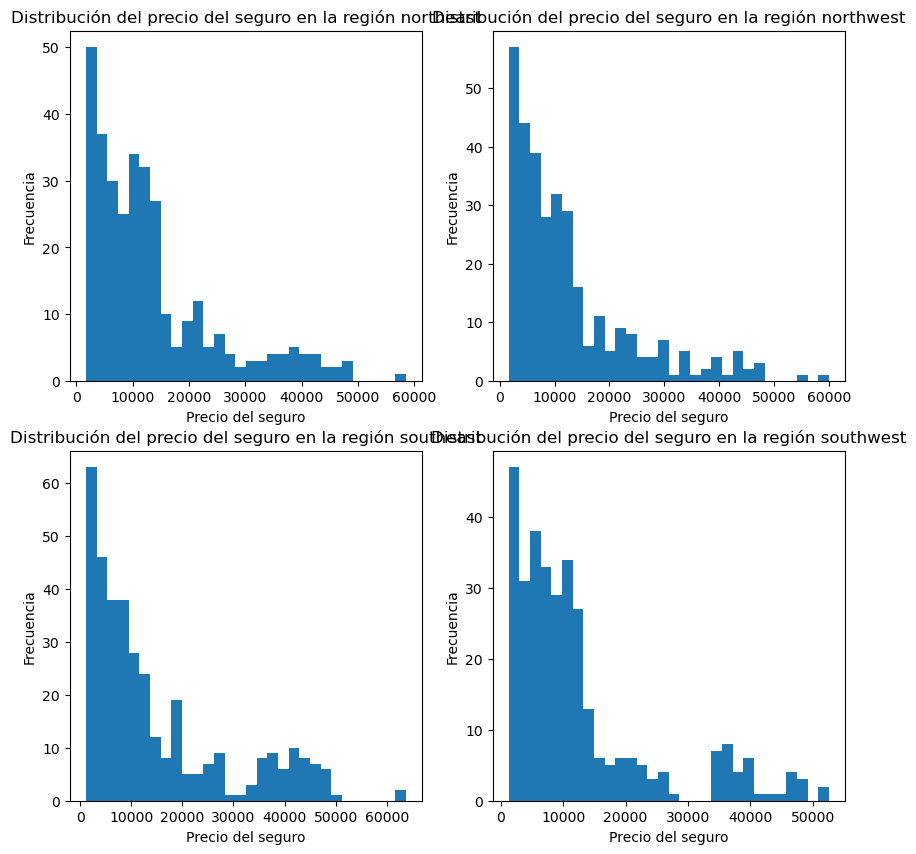

In [23]:
# Mostrar histogramas con la distribución del precio del seguro según la región. Hay 
# 4 regiones, hay que mostrar 4 subplots, cada uno con un histograma.

# seleccionar las columnas "charges" y "region"
charges_by_region = datos[["charges", "region"]]

# crear los subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# generar un histograma para cada región
for i, (region, data) in enumerate(charges_by_region.groupby("region")):
    ax = axs[i // 2, i % 2]
    ax.hist(data["charges"], bins=30)
    ax.set_xlabel("Precio del seguro")
    ax.set_ylabel("Frecuencia")
    ax.set_title(f"Distribución del precio del seguro en la región {region}")
    
plt.show()

Ejercicio 4.
Escribe una versión del ejercicio 1.3 utilizando seaborn.

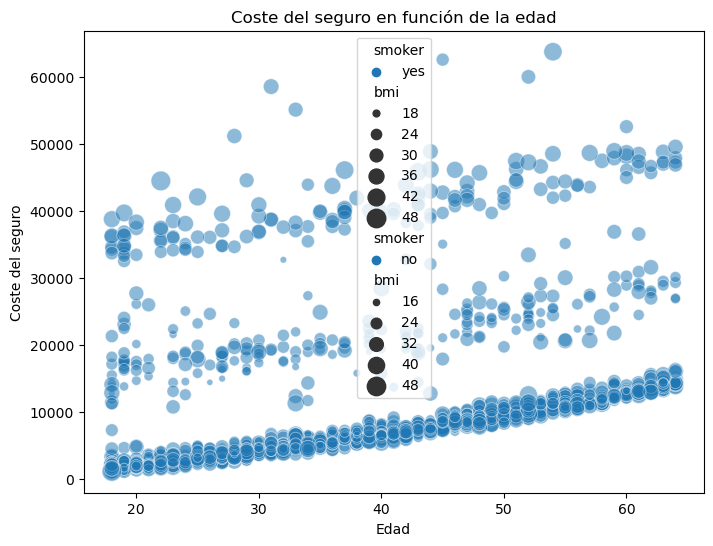

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x=datos.loc[datos['smoker'] == 'yes', 'age'],
y=datos.loc[datos['smoker'] == 'yes', 'charges'],
size=datos.loc[datos['smoker'] == 'yes', 'bmi'],
hue=datos.loc[datos['smoker'] == 'yes', 'smoker'],
sizes=(20, 200), alpha=0.5, legend='brief', ax=ax)

sns.scatterplot(x=datos.loc[datos['smoker'] == 'no', 'age'],
y=datos.loc[datos['smoker'] == 'no', 'charges'],
size=datos.loc[datos['smoker'] == 'no', 'bmi'],
hue=datos.loc[datos['smoker'] == 'no', 'smoker'],
sizes=(20, 200), alpha=0.5, legend='brief', ax=ax)

ax.set_xlabel('Edad')
ax.set_ylabel('Coste del seguro')
ax.set_title('Coste del seguro en función de la edad')
plt.show()